# Assignment 2: Conway's Game of Life

## ** DUE: Friday October 20, 2017 11:59 PM **

In this assignment, we're going to be writing a "game" that simulates a self propagating population of organisms known as ["Conway's Game of Life"](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life).

In 1970, mathematician John Horton Conway wanted to find a set of simple rules that if applied to an environment would produce complex and self sustaining patterns. 

He modeled the world as an $NxN$ grid where each cell in the grid can be either alive or dead (1 or 0).

The goal was to start with some initial grid where some cells are alive and some are dead, and then have the grid updated repetitively using these simple rules:

### Rules:
1. Any living cell that has **fewer than** 2 living neighbours dies in the next generation (as if by underpopulation).
2. Any living cell that has **exactly** 2 or 3 living neighbours lives in the next generation.
3. Any living cell that has **more than** 3 living neighbours dies (as if by overpopulation).
4. Any dead cell that has **exactly** 3 living neighbours comes back to life in the next generation (as if by reproduction).

So say we have an initial grid `G_initial` with some cells having value 0 (dead) and others having value 1 (alive). The goal is to come up with values for each entry in `G_next` by looking at each cell in `G_initial[i][j]` and seeing if it will be alive or dead in `G_next[i][j]`. Using the rules above we can always determine if a cell will be alive or dead in the next generation. Once we can do this, we can just repeat the procedure as many times as we want to simulate the evolution of our world.

Turns out that with these 4 simple rules Conway was able to simulate some very interesting patterns which have had a large impact on many fields such as biology, physics, computer science, mathematics, and philosophy. Conway was able to show that with a few simple rules and an initial state, complex patterns can emerge without any external intervention.

Here is a video of some interesting patterns that can emerge if you have the right starting state: https://www.youtube.com/watch?v=C2vgICfQawE&t=15s

You can also watch Conway himself talking about how he invented the game and how he is a bit tired of everyone associating him to only that https://www.youtube.com/watch?v=R9Plq-D1gEk

And definitely read the [Wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) article


** Requirements **

In this assignment we'll be working with the python package `numpy`, as well as two visualization packages so we can make cool animations. Since you are using anaconda this will be very easy to install. All you have to do is open your Terminal or Command Prompt and type in the following commands

```
conda install numpy
conda install matplotlib
conda install -c conda-forge jsanimation
```
If this is not working, please Google it. If that doesn't work go to office hours and we will help you with the installation. Try this out as soon as possible.

**NOTA BENE:** This is a very well studied problem and you will find many examples online of other people's implementations of the game of life. It's perfectly okay to look at other sources for inspiration but keep in mind that we do run plagiarism checks so make sure that the code comes from you in the end.

# Warmup (40 points)


But first, some warmup!

**Q1.** Write a function that **returns** the items of a given list in reverse order, then call the function and print its output. (You may **NOT** use any built-in python functions other than `len()` or `range()`) **(5 points)**

In [9]:
def my_reverse(given_list):
    #swap 1st and last item, and 2nd and second last, etc
    for number in range(len(given_list)):
        #if even number of items in the list, 
        if len(given_list)%2==0:
            
            if number == (len(given_list)/2):
                #at this point, it'll be past halfway, and if swapped, it will undo the work done before
                break
            else:
                temp = given_list[number]
                given_list[number] = given_list[len(given_list)-number-1]
                given_list[len(given_list)-number-1] = temp
        #if odd number of items in the list
        else:
            if number == int(len(given_list)/2):
                #this item is the midway point and cannot be swapped with anything
                break
            else:
                temp = given_list[number]
                given_list[number] = given_list[len(given_list)-number-1]
                given_list[len(given_list)-number-1] = temp 
    return given_list
            
            

In [10]:
#call it and print its output. (do this for the rest of the warmup questions)
example_list = ["apples", "oranges", "pineapples", "strawberries", "blueberries", "peaches", "kiwis"]
print(my_reverse(example_list))

['kiwis', 'peaches', 'blueberries', 'strawberries', 'pineapples', 'oranges', 'apples']


**Q2.** Write a function called `mygrid(n, val)` that creates a 2D list with $N$ rows and $N$ columns where every index has the value $val$. We refer to this kind of list as a **matrix** or a **grid**. **(5 points)**

Example:
```python
>>> g = mygrid(3, 1)
[[1, 1, 1], [1, 1, 1], [1, 1, 1]]
```

In [11]:
def mygrid(n, val):
    row=[]
    grid=[]
    #first create contents of each row (2nd list)
    for i in range(n):
        row.append(val)
    #now create the columns
    for i in range(n):
        grid.append(row)
    return grid
    

In [12]:
print(mygrid(3,1)) 

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]


**Q3.** Write a function called `trace(matrix, reverse=False)` that takes as input a 2D list `matrix` and returns the sum of the elements on the diagonal. The diagonal elements of the matrix are those that lie along a diagonal line from the top left to the bottom right. In other words, $(i, j) \in M \vert i == j$. This is read as: all index pairs $(i, j)$ in the matrix such that both indices are equal to each other. **Note:** You may not use any numpy functions. Just simple loops and if statements.

Additionally, the function takes an optional keyword argument `reverse`. If `reverse` is `True`, every row in the grid is reversed before the trace is taken. Otherwise the trace is taken with the grid as-is. Use your `my_reverse()` function that you defined above. **(10 points)**

Example:

```python
>>> M = [[1, 2, 3], [4, 5, 6], [7, 8 ,9]]
>>> trace(M)
15
```

In [13]:
def trace(matrix, reverse=False):
    sum = 0
    if reverse == True:
        for item in matrix:
            my_reverse(item)
    for i in range(len(matrix)):
        #assume that the matrix is N x N
        for j in range (len(matrix)):
            if i==j:
                sum += matrix[i][j]
    return sum

In [14]:
matrix = [[1,2,3], [4,5,6], [7,8,9]]
print(trace(matrix, reverse=True)) #testing reverse=true

15


**Q4.** Write a function called `encrypt(s, encryption_key)` that accepts a string and an integer `encryption_key` and produces a string whose characters have been shifted over to the right in the alphabet by `encryption_key` places. **(15 points)**

Example:

```python
>>> encrypt("carlos", 3)
fduorv
```

Characters in Python can be mapped to integers. You can think of these as positions in the alphabet. The `ord(c)` function returns the integer value of a character.

```python
>>> ord('a')
97
>>> ord('b')
98
...
>>> ord('z')
122
```

You can go the other way too. Given an integer you can get its corresponding character.

```python
>>> chr(97)
'a'
>>> chr(ord('a') + 1)
'b'
```

Our encryption function will only accept lowercase strings and only produce lowercase 'letter' strings.

This would correspond to integers from `ord('a') -->  97` to  `ord('z') --> 122`.

We want to make sure that when shifting a character we always stay in the same range of numbers so our encrypted string is still all lowercase letters.

For example:

```python
>>> encrypt("z", 1)
'a'
>>> encrypt("z", 27)
'a'
>>> encrypt("z", 26)
'z'
>>> encrypt("z", 233)
'y'
```

This means that for any `encryption_key` value, you will always shift the original to some number between 97 and 122.

**Hint:** remember the modulo operator!!!

**User interface: (5 points) **
1. Prompt the user for a string and an encryption key (you can ask them to enter it in one line separated by a space or on separate lines)
2. Try to convert the encryption key to integer and handle the ValueError in case the integer conversion files (if the user gives something that can't be converted to integer)
3. Print the result of encrypting the string.
4. Repeat 1., 2., and 3. until the user enters the string "@"

In [3]:
#encrypt function
def encrypt(s, encrypt_key):
    s = s.lower() 
    encrypted=""
    remainder = encrypt_key%26
    for letter in s:
        if remainder !=0:
            left = 122-ord(letter)
            #to avoid modulo operation by zero.
            if left != 0:
                add = remainder%left
                new = ord(letter)+add
                encrypted+=chr(new)
            else:
                new = 97+remainder-1
                encrypted += chr(new)
        #if remainder is zero, keep current letter.
        else:
            encrypted+=letter
            
    return encrypted

print(encrypt("Carlos",3))

fduorv


In [16]:
#user interface
while True:
    s = input("Enter the string you would like to encrypt: ")
    encryption_key =""
    if s == "@":
        break
    while True:
        try:
            encryption_key = int(input("Enter your encryption key: "))
        except ValueError:
            print("Invalid encryption key. Must be an integer.")
            continue
        else:
            break
    #if encryption key is not an int, ask until a valid one is provided
    #if encryption key is valid, break from loop asking for encryption key
    #at this point, all inputs should be valid
    s = s.lower()
    print(encrypt(s,encryption_key))

Enter the string you would like to encrypt: @


Since we're dealing with a grid of numbers (matrices), we're going to use python's [`numpy`](https://docs.scipy.org/doc/numpy-1.13.0/user/index.html) package which lets us handle matrices really efficiently. For our purposes you won't notice much of a difference from regular lists and nested lists. Let's import `numpy` and give it a nickname `np`.

In [17]:
import numpy as np

The main `type` numpy uses is called a numpy array. We can think of it as a regular list but with some very nice functionality.  Numpy arrays are highly optimized to be efficient for numerical operations and unlike lists, they hold objects of the same type. We can create a new numpy array by calling the numpy function `array()`.

In [18]:
myarray = np.array([1, 2, 3, 4])

We can index arrays just like Python lists.

In [19]:
myarray[0:-1]

array([1, 2, 3])

We can make arrays of arrays to work with grids (aka matrices)

In [20]:
mygrid = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(mygrid)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


Numpy arrays have a very useful attribute called `shape`. Which gives us a tuple representing the dimensions of the array. For a 2D array the numbers in the tuple woulr represent `(rows, cols)`

In [21]:
print(mygrid.shape)

(4, 3)


The main functionality of numpy arrays that we will use for this assignment is that we can easily initialize arrays of any shape we want with some initial value. As you saw in the warmup, doing this with normal lists involves writing nested loops and it's not very fun. With numpy, we can use the `np.full()`, `np.zeros()`, `np.ones()` functions.

In [22]:
np.full((4, 3), 20)

array([[20, 20, 20],
       [20, 20, 20],
       [20, 20, 20],
       [20, 20, 20]])

In [23]:
np.zeros((4, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [24]:
np.ones((4, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## Coding the Game of Life (60 points)

Okay now that we're all warmed up and have all the tools we need, let's code the game of life. Before starting any coding project it's good to have an plan (aka algorithm). So let's write one out to keep in mind while we code our program. 

The main objective is to take a grid of cells (NxN grid with 0 for dead cells and 1 for living cells), let's call it $G_t$ and figure out what the grid will look like at the next time step $G_{t+1}$. Once we can to this, we just have to repeat this update for as many time steps as we want the simulation to run for. So what do we need to actually do this updating?

1. Start a grid full of 0 $G_{t+1}$

1. For every cell $(i, j)$ in $G_t$:

    1. Get all the cell's neighbhours (up, down, left, right, and diagonal)
    2. Count how many of those neighbours are alive.
    3. Use the rules of the Game of Life to update the value of cell (i, j) in $G_{t+1}$


### Coding the Game of life: Get the neighbours

**Q5.** Write a function called `get_neighbours(i, j, G)` which returns a list containing the **indices** of the neighbours to cell $(i, j)$ as tuples. $G$ is the grid. For this function you will only need to use the dimensions of the grid. **(20 points)**

Example:

```python
>>> get_neighbours(1, 1, 5)
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
```
The list should exclude index $(i, j)$.

We count as neighbours any index that is adjacent or immediately diagonal to $(i, j)$. Imagine a 3x3 grid. The midle cell would have every other cell as neighbours.

**Important:** in some cases, the neighbours of $(i, j)$ will fall outside of the grid. For example, if you are getting the neighbours of $(2, 2)$ in a $3\times 3$ grid, anything to the right or down from that index will fall oustide of the grid. In this case, you should include the corresponding index on the opposite end of the grid. **Hint:** remember the modulo operator and the encryption example.

For example, if we want the neighbours of (2, 2) in a 3x3 grid, the neighbour at $(i, j+1)$ would be $(2, 0)$. The $(i+1, j+1)$ neighbour would then be $(0, 0)$, and the $(i+1, j)$ neighbour would be $(0, 2)$.

In [25]:
def get_neighbours(i,j,G):
    #get up, down, left, right and diagonals.
    #exclude i,j
    neighbours = []
    #get left neighbour
    dimensions = np.array(G).shape
    #where G.shape returns (#row, #columns)
    #i = y coordinate, length is #rows, j = x coordinate, length is #columns

    #get NORTHWEST
    x = (j%dimensions[1]-1)%dimensions[1]
    y = (i%dimensions[0]-1)%dimensions[0]
    neighbours.append([y,x])
    #get NORTH
    x = j
    y = (i%dimensions[0]-1)%dimensions[0]
    neighbours.append([y,x])
    #get NORTHEAST
    x = (j%dimensions[1]+1)%dimensions[1]
    y = (i%dimensions[0]-1)%dimensions[0]
    neighbours.append([y,x])
    #get WEST
    x = (j%dimensions[1]-1)%dimensions[1]
    y = i
    neighbours.append([y,x])
    #get EAST
    x = (j%dimensions[1]+1)%dimensions[1]
    y = i
    neighbours.append([y,x])
    #get SOUTHWEST
    x = (j%dimensions[1]-1)%dimensions[1]
    y = (i%dimensions[0]+1)%dimensions[0]
    neighbours.append([y,x])
    #get SOUTH
    x = j
    y = (i%dimensions[0]+1)%dimensions[0]
    neighbours.append([y,x])
    #get SOUTHEAST
    x = (j%dimensions[1]+1)%dimensions[1]
    y = (i%dimensions[0]+1)%dimensions[0]
    neighbours.append([y,x])    
    return neighbours


    
    
    
    

In [26]:
grid = np.zeros((3,3))
print(get_neighbours(1,1,grid))

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]


**Q6.** Write a function called `count_live_neighbours(G, i, j)` that returns the number of live neighbours to a given index $(i, j)$. The function should call your `get_neighbours()` function in order to get the indices of the cell's neighbours. **(20 points)**

Example:

```python
>>> G = np.array([[0, 0, 1],[0, 1, 0], [1, 0, 0]])
>>> count_live_neighbours(G, 1, 1)
2

```

In [27]:
def count_live_neighbours(G, i, j):
    neighbours = get_neighbours(i,j,G)
    count = 0
    m = 0
    for k in neighbours:
        if G[k[m]][k[m+1]] == 1:
            count+=1
            m+=1
        m=0
    return count

In [28]:
G = np.array([[0, 0, 1],[0, 1, 0], [1, 0, 0]])
print(count_live_neighbours(G, 1,1))

2


**Q7.** Write a function called `life_step(G)` which takes a grid of cells and returns a new grid after the rules of the game of life have been applied. **(20 points)**

Example:

```python
>>> G_0 = np.array([[1, 0, 1],[0, 1, 0], [0, 0, 0]])
>>> G_next = life_step(G_0)
>>> print(G_next)
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
>>> G_0 = np.array([[0, 0, 0],[0, 1, 0], [0, 0, 0]])
>>> G_next = life_step(G_0)
>>> print(G_next)
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
>>> life_step(np.array([[0, 0, 0,0], [0, 1, 1, 1], [0, 0, 0,0], [0, 0, 0, 0]]))
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]
```

In [29]:
#rules of life 
#1. Any living cell that has **fewer than** 2 living neighbours dies in the next generation (as if by underpopulation).
# 2. Any living cell that has **exactly** 2 or 3 living neighbours lives in the next generation.
# 3. Any living cell that has **more than** 3 living neighbours dies (as if by overpopulation).
# 4. Any dead cell that has **exactly** 3 living neighbours comes back to life in the next generation (as if by reproduction).
def life_step(G):
    #iterate through each cell in G.
    G_new = np.zeros((len(G),len(G[0]))).tolist()
    for index, i in enumerate(G):
        for j in range(len(i)):
            nn = count_live_neighbours(G,index,j)
            if G[index][j] == 1: 
                if nn < 2:
                    G_new[index][j] = 0
                elif nn == 2 or nn == 3:
                    G_new[index][j] = 1
                elif nn > 3:
                    G_new[index][j] = 0
            if  G[index][j] == 0:
                if nn == 3:
                    G_new[index][j] = 1
                else:
                    G_new[index][j] = 0

    return G_new

In [36]:
G_0 = np.array([[0, 0, 0, 0],[0, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]])
print(G_0)
G_next = life_step(G_0)
print(np.array(G_next))


[[0 0 0 0]
 [0 1 1 1]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 0]]


### Visualizing your simulation

Ok now the hard part is done, all that's left is to visualize what we've coded! Since we have a function that can always give us the next step in the simulation, we just have to call it repeatedly to advance the simulation in time. 

The next cell contains a function called `life_animation()` that does just that. It has some more advanced code that is used for turning the numpy grids of 0 and 1 into a nice animation so don't worry about what's inside. All you need to know is how to call the function.

`life_animation(X)` takes a numpy grid like the ones we were working on above and then it takes some **keyword** arguments which let you control how you want the simulation to go. The only one you will want to play with is `frames=10` which sets the number of steps you want the simulation to take. You can set this to whatever you want when calling the function.

So just execute the cell to store the function and scroll down.

In [31]:
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation
import matplotlib.pyplot as plt

def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):
    """Produce a Game of Life Animation (Borrowed from https://jakevdp.github.io)
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)

    #fig = plt.figure(figsize=figsize, dpi=dpi)
    fig = plt.figure(dpi=dpi)
    
    fig.set_size_inches(40, 40)
    
    
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    return display_animation(anim, default_mode=mode)

The cell below defines a grid to start off the simulation and passes it to `life_animation()`. If your implementation was correct, you should be able to see how the group of cells keeps growing.


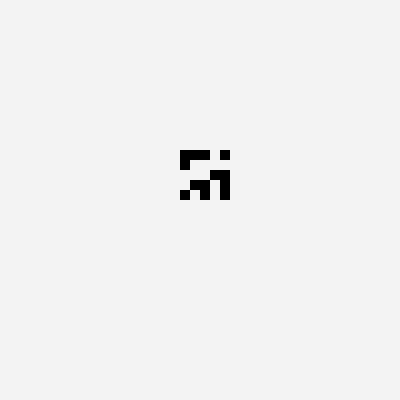
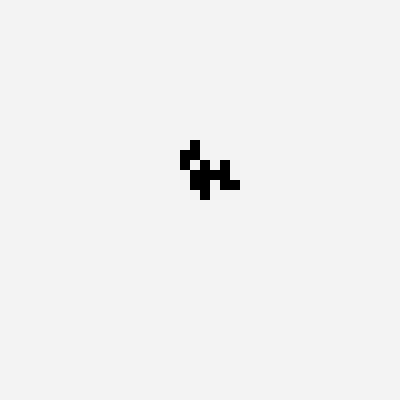
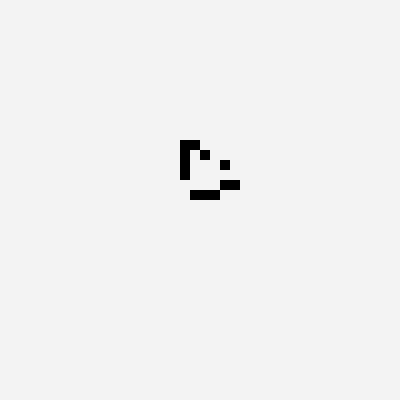
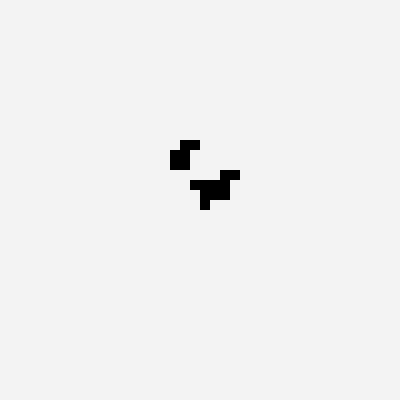
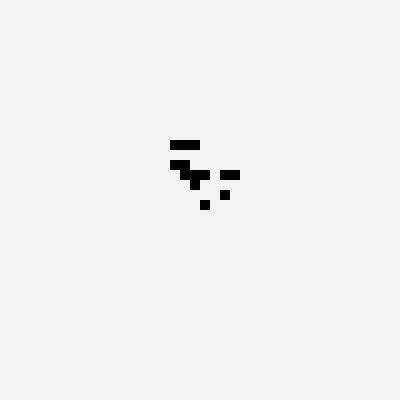
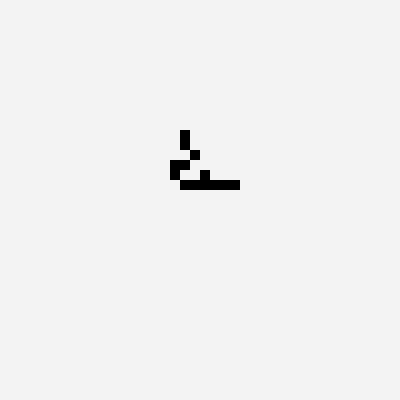
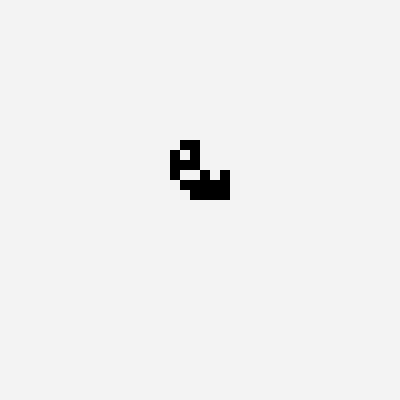
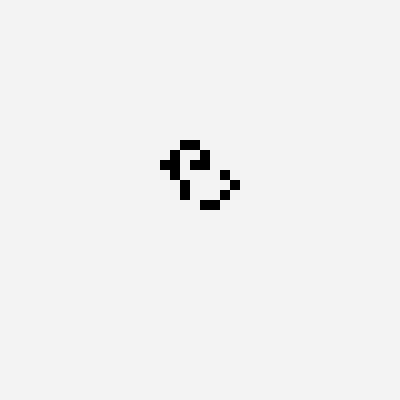
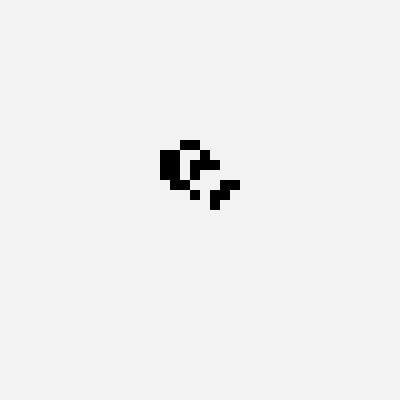
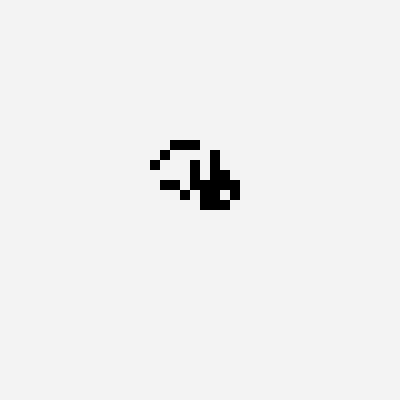
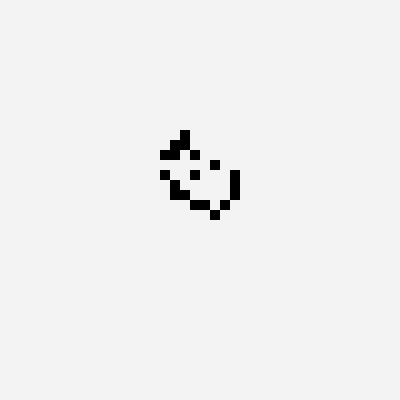
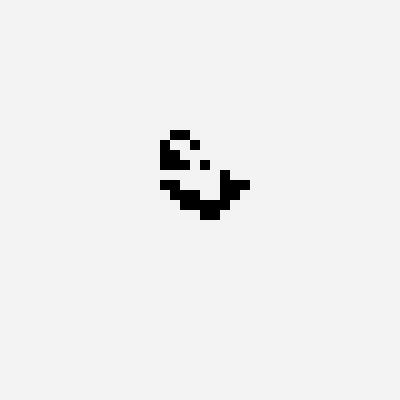
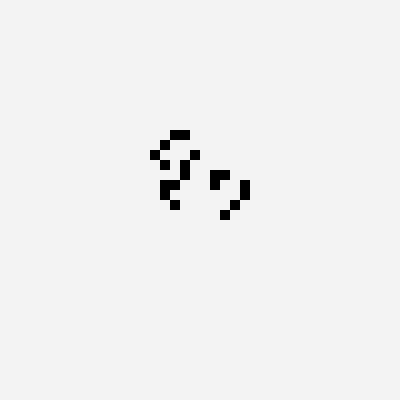
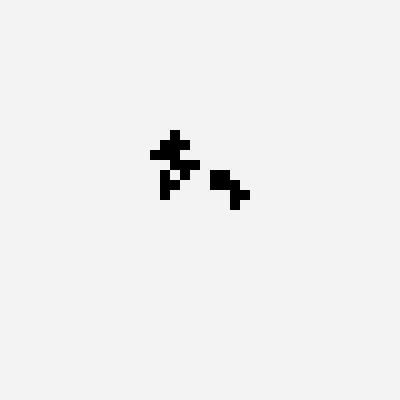
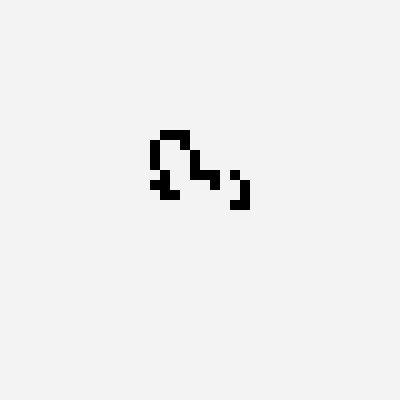
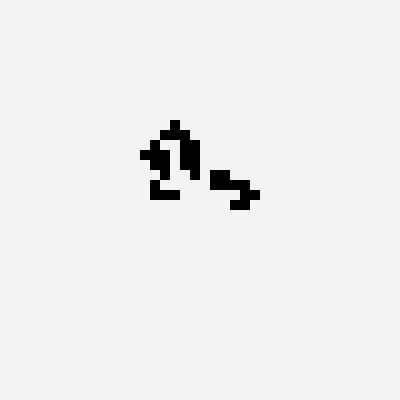
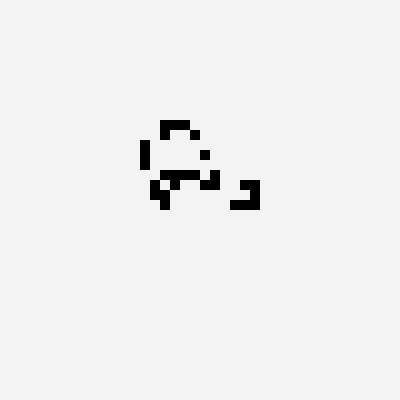
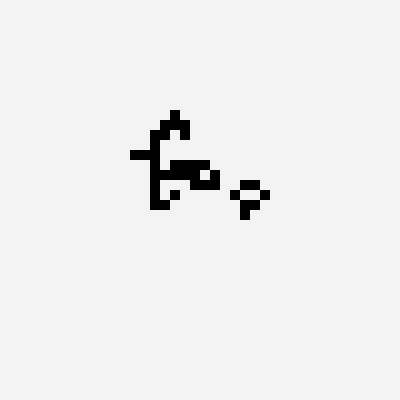
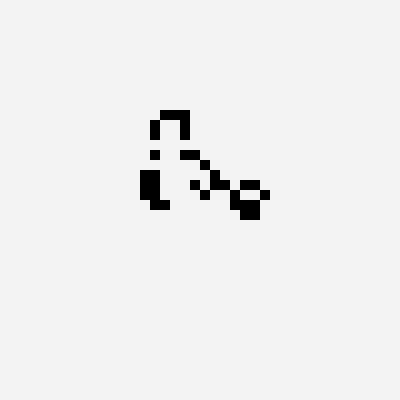
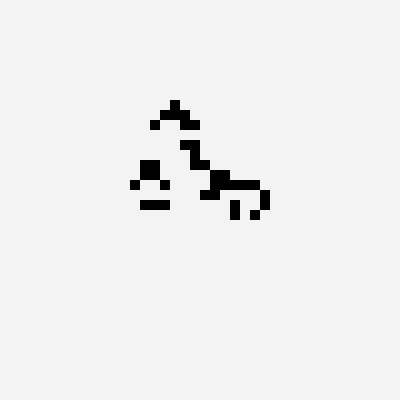
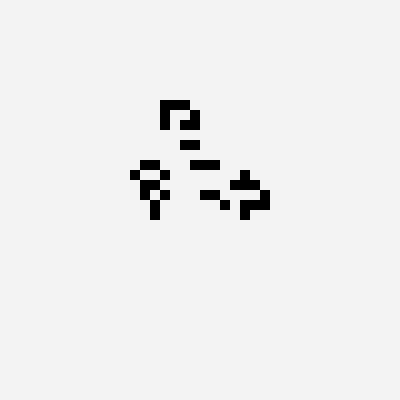
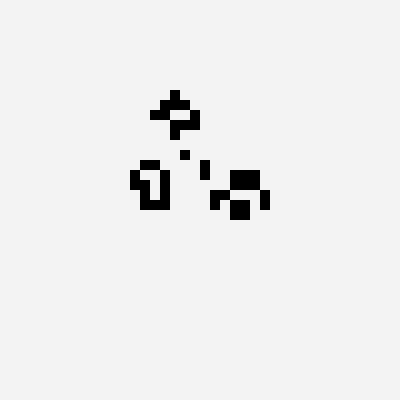
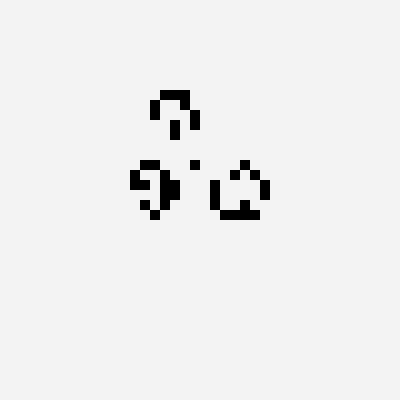
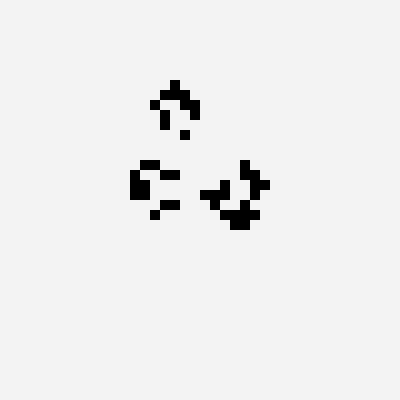
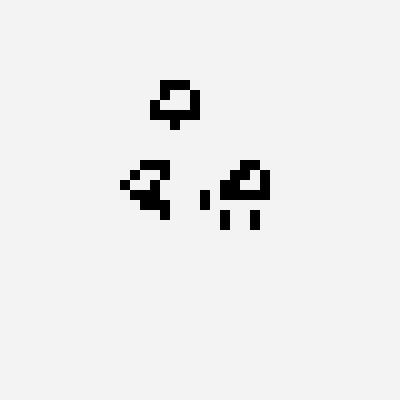
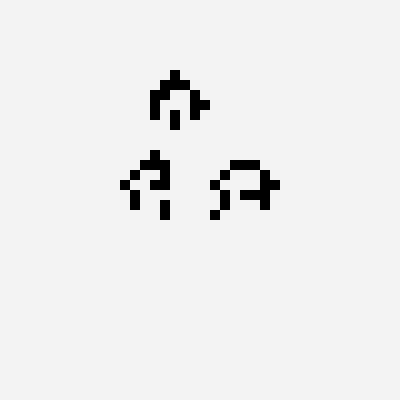
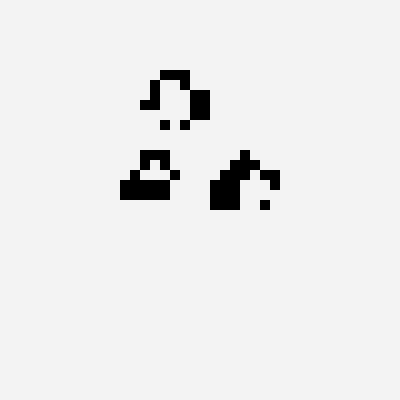
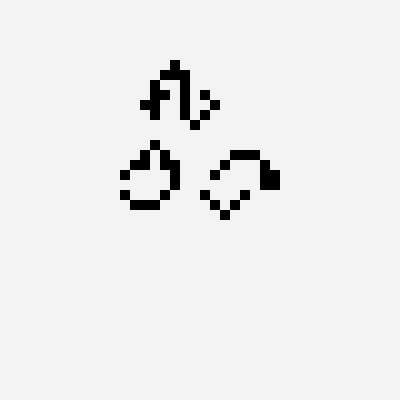
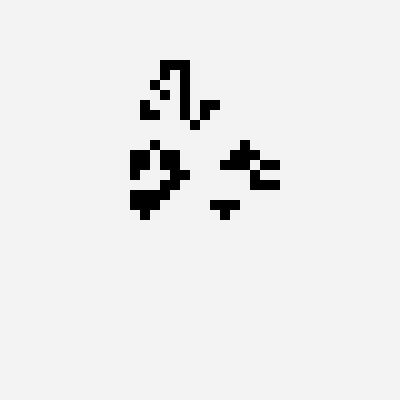
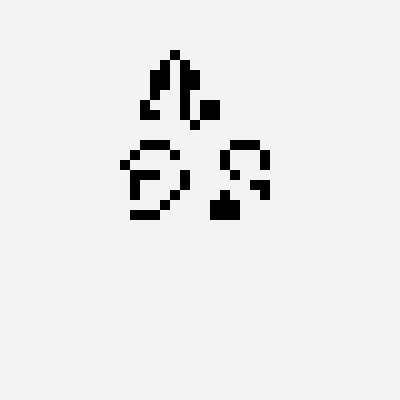
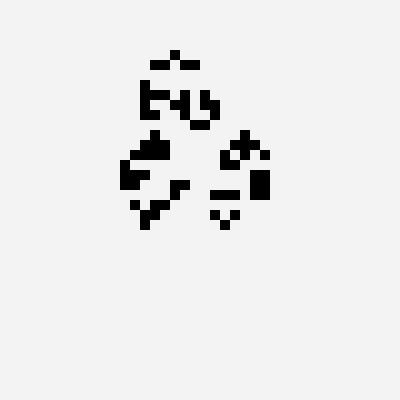
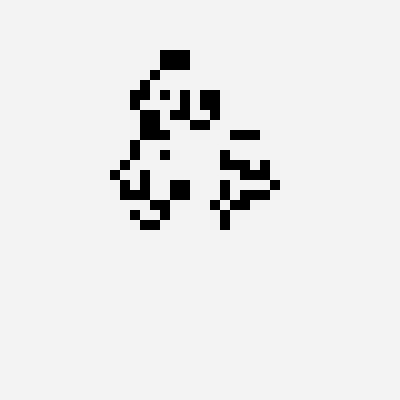
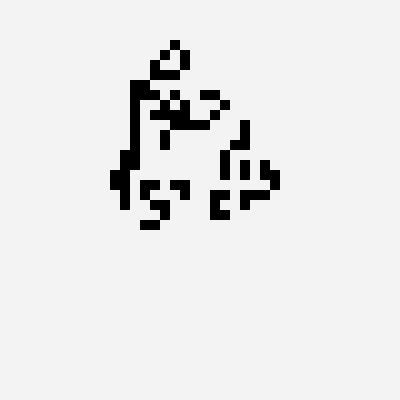
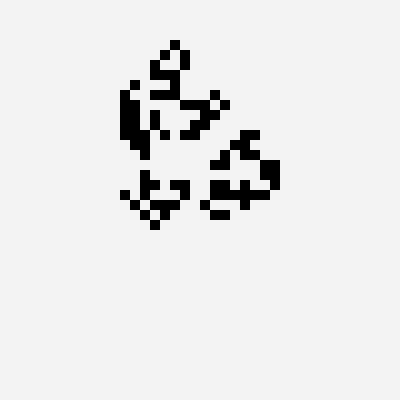
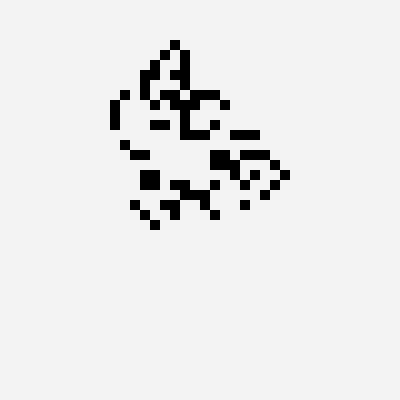
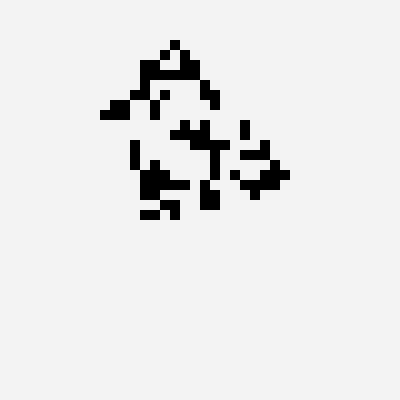
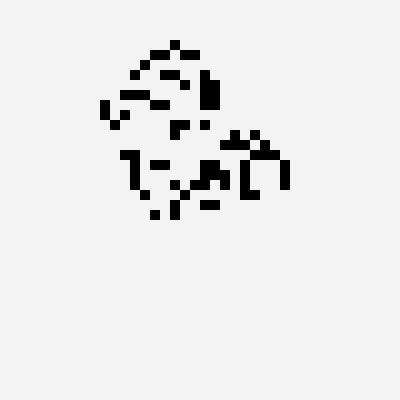
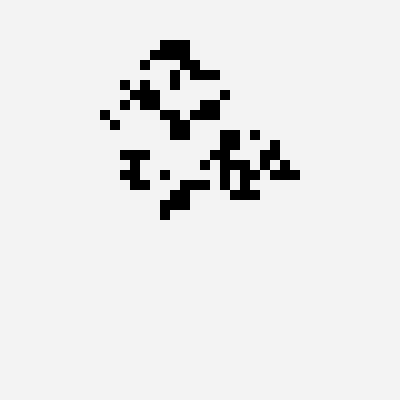
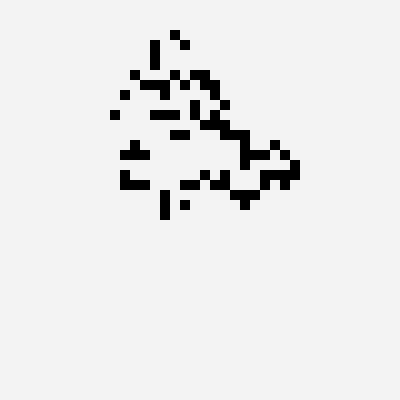
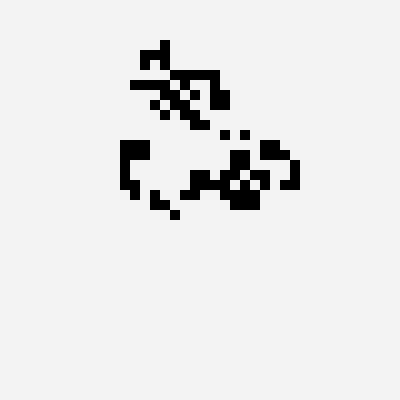
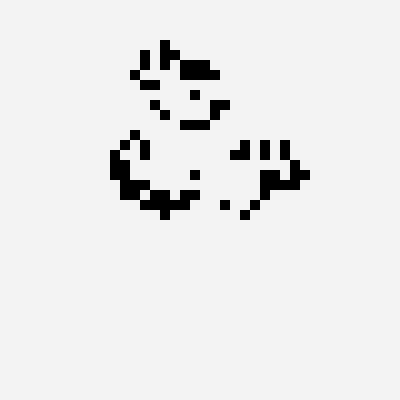
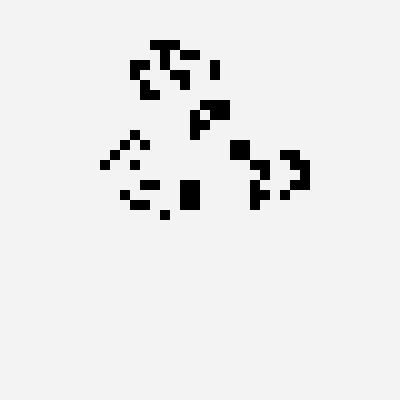
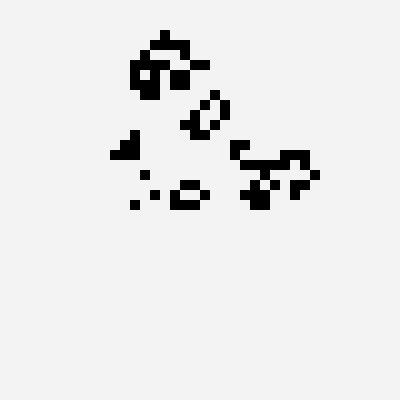
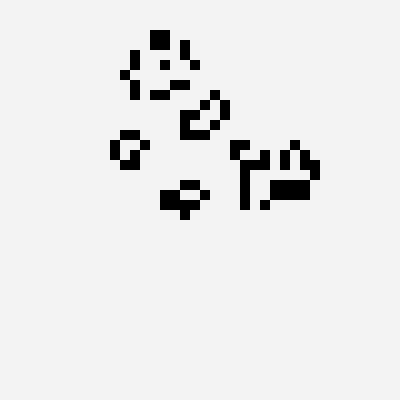
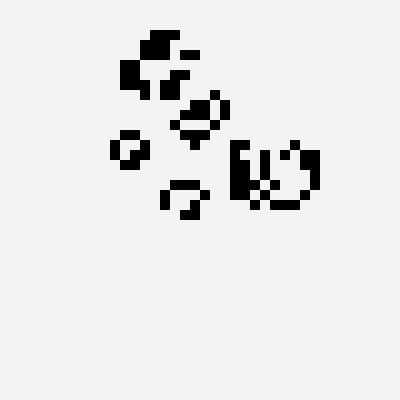
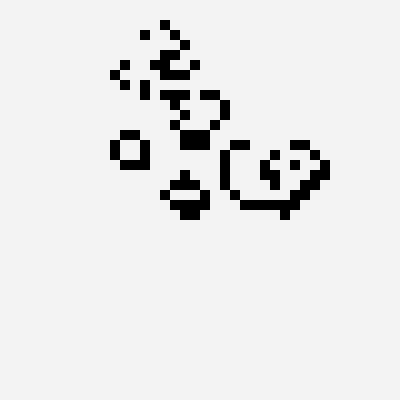
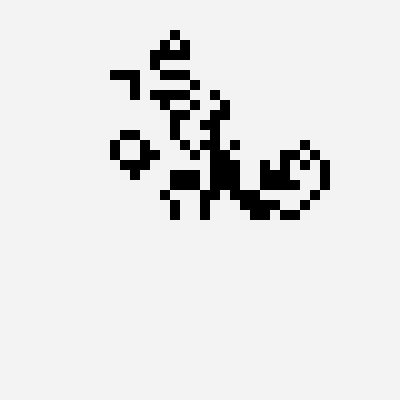
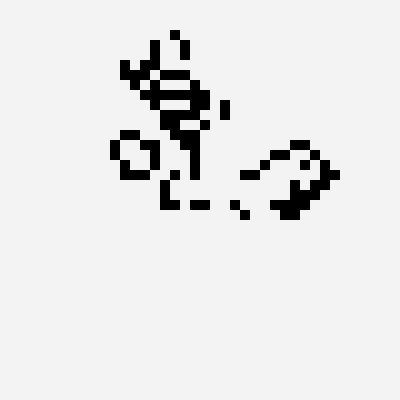
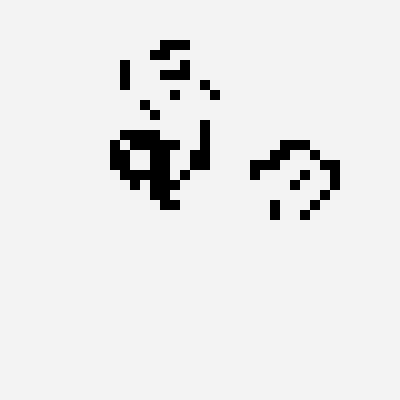
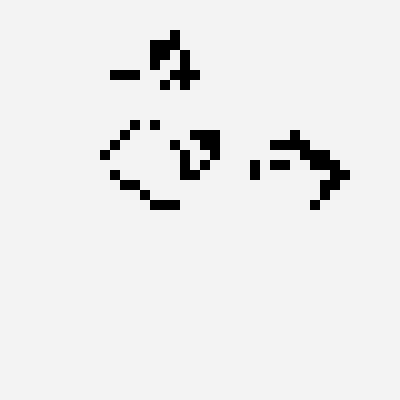
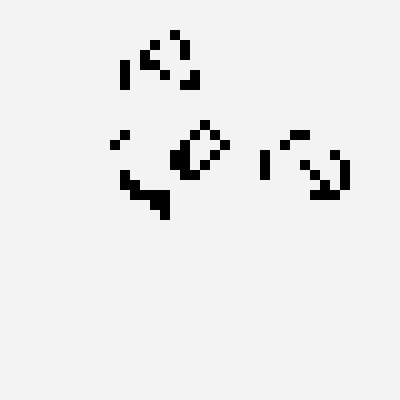
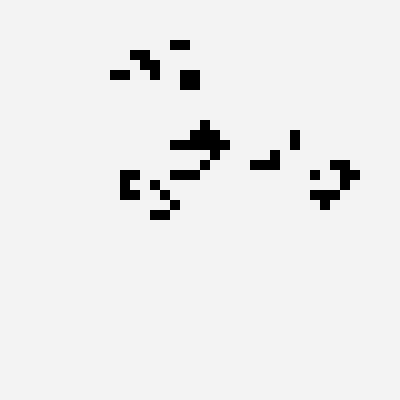
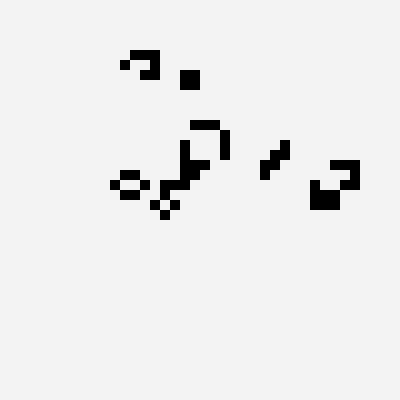
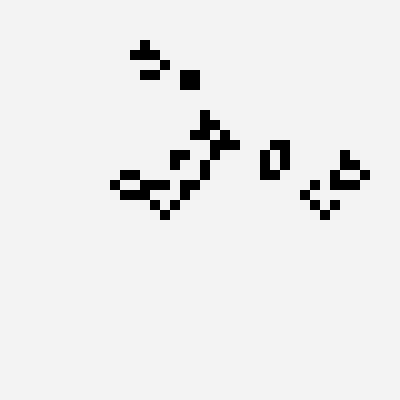
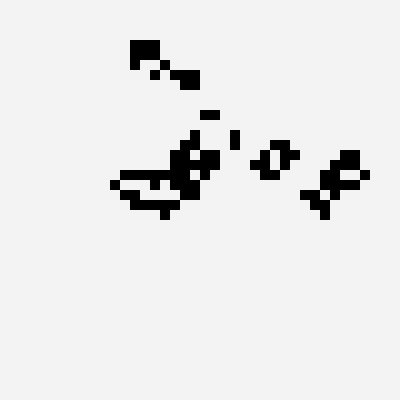
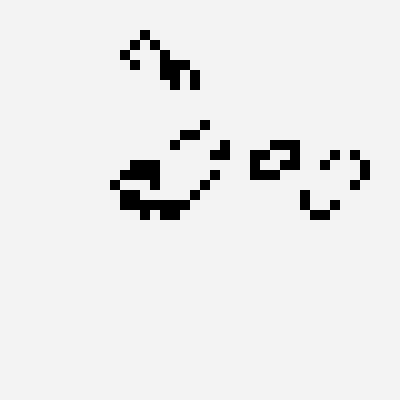
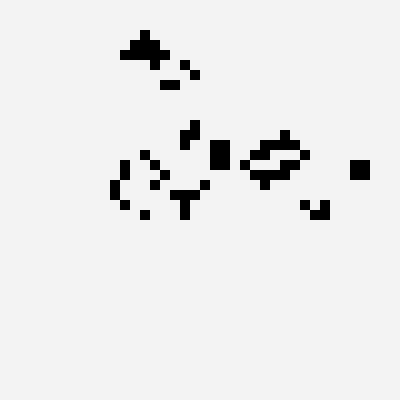
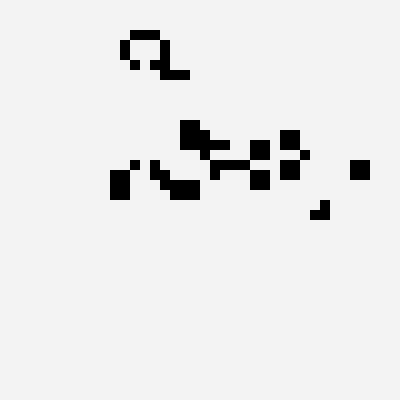
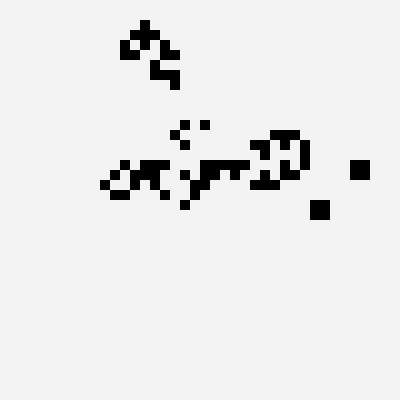
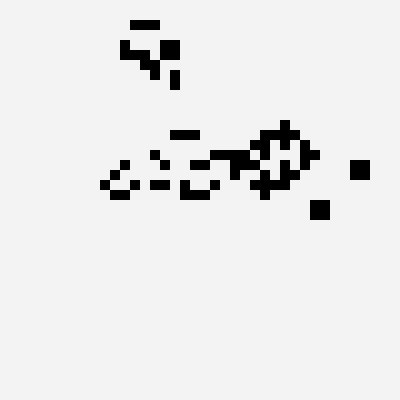
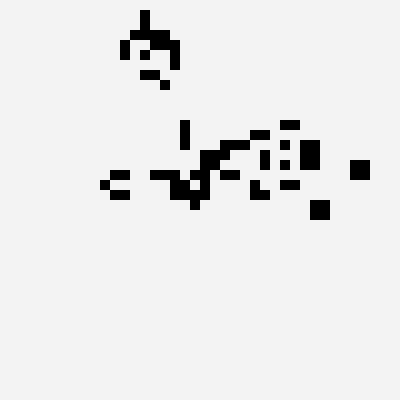
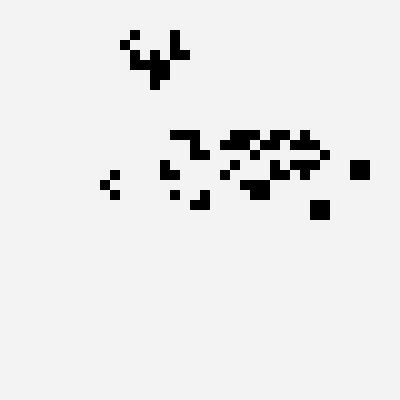
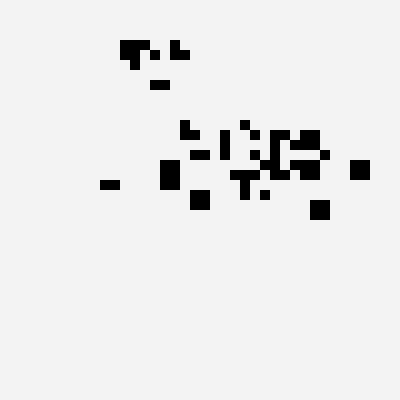
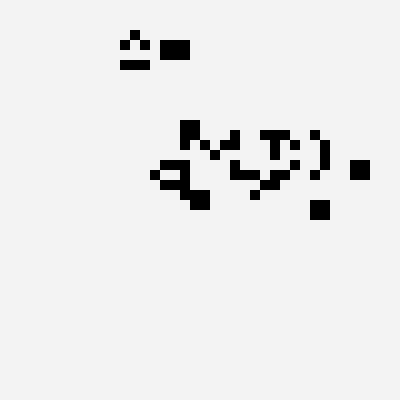
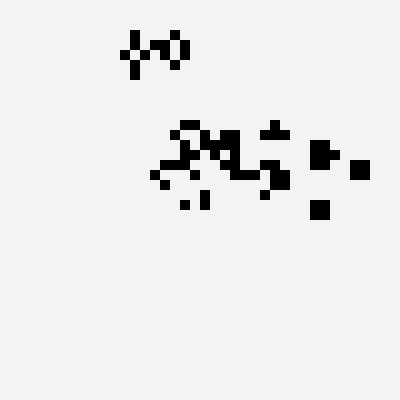
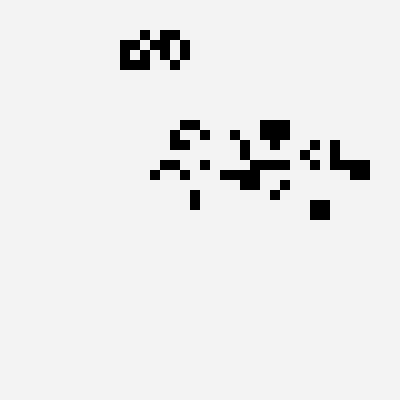
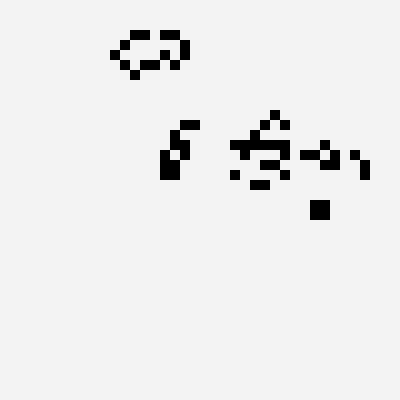
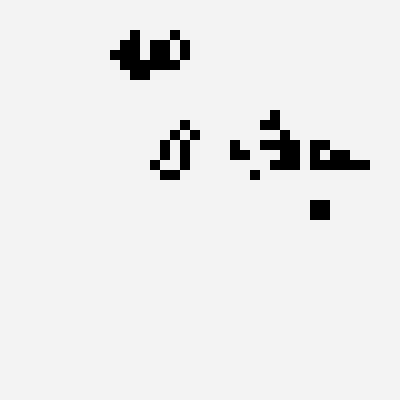
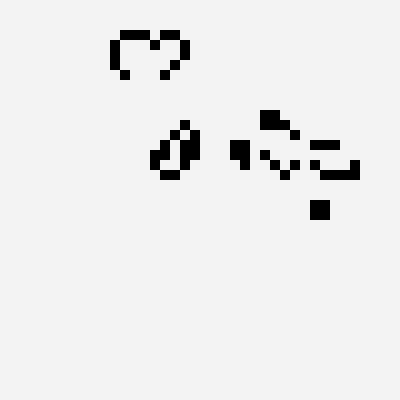
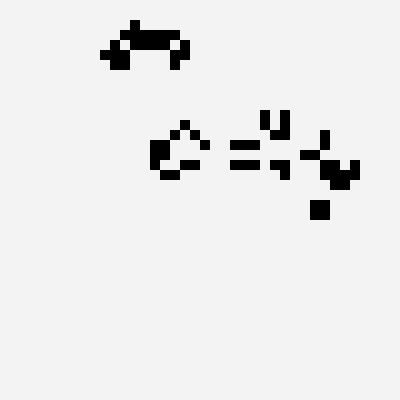
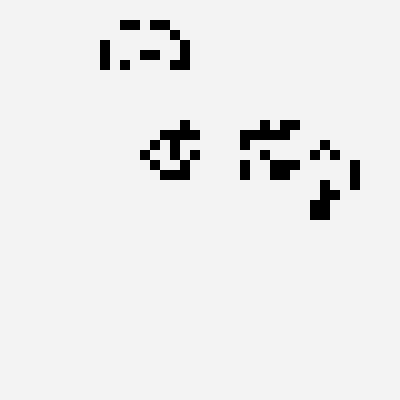
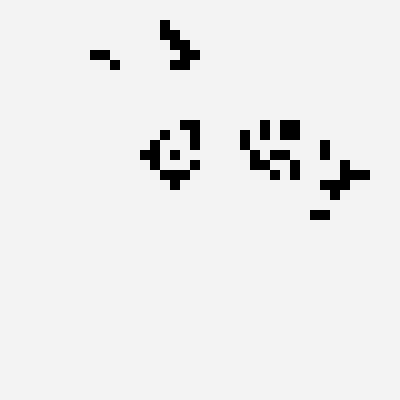
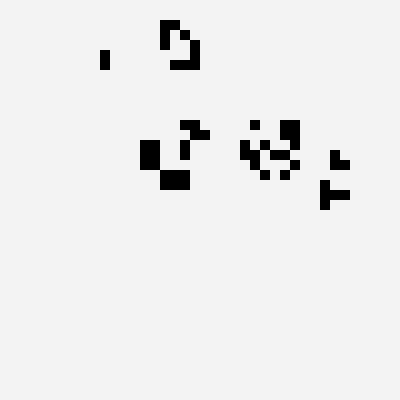
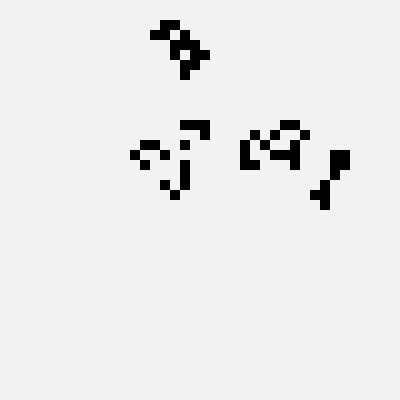
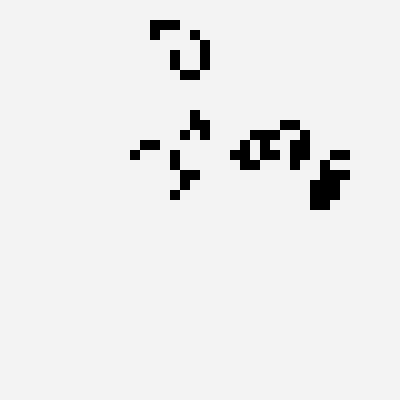
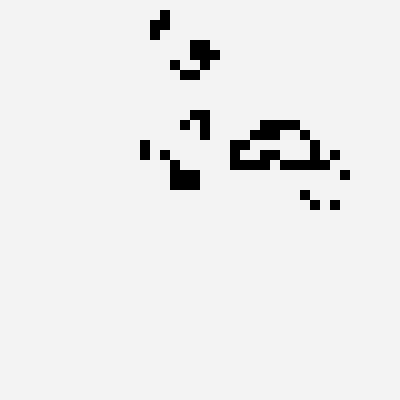
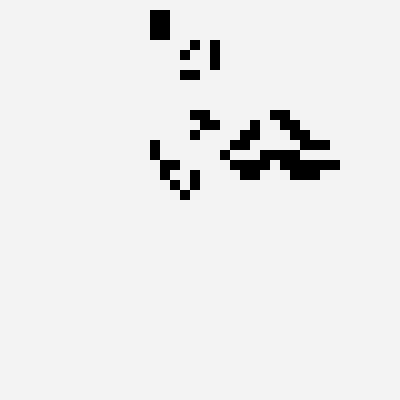
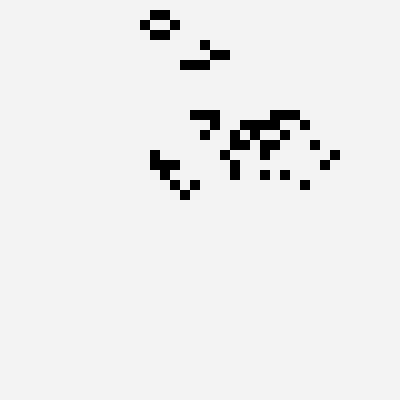
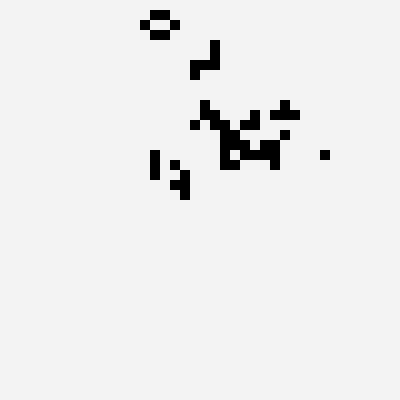
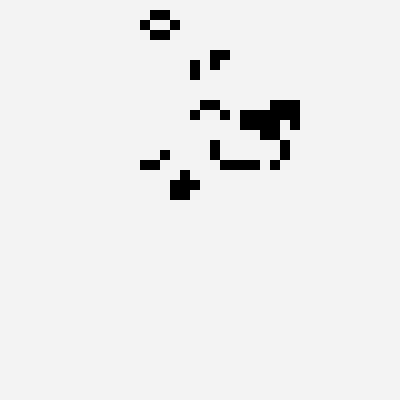
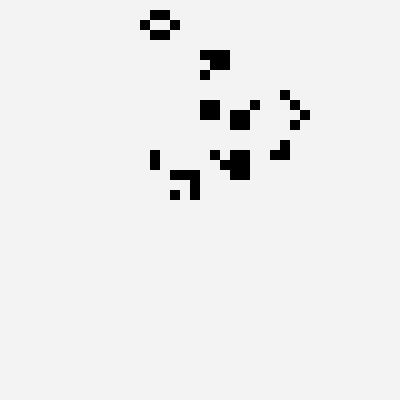
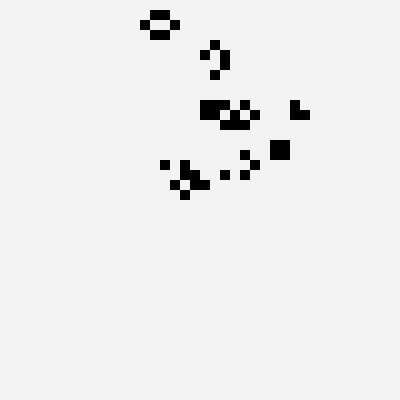
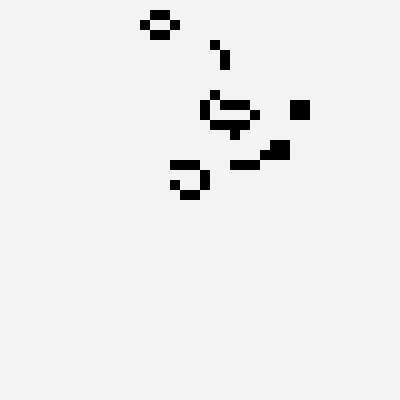
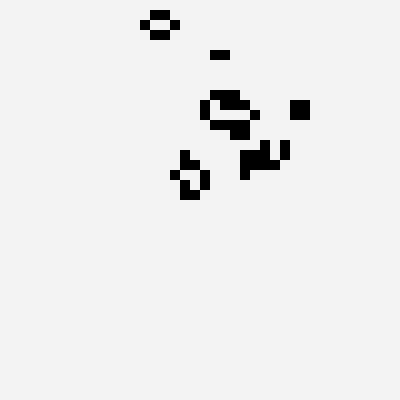
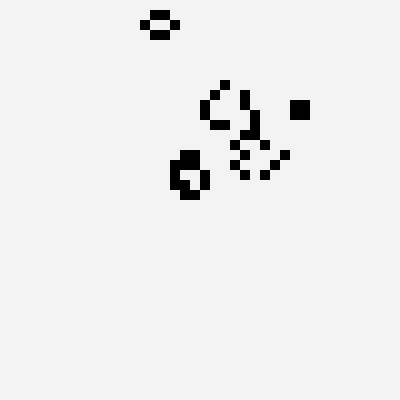
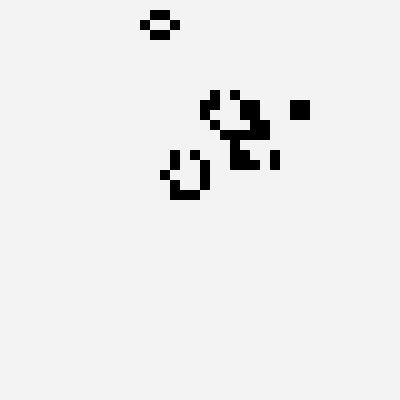
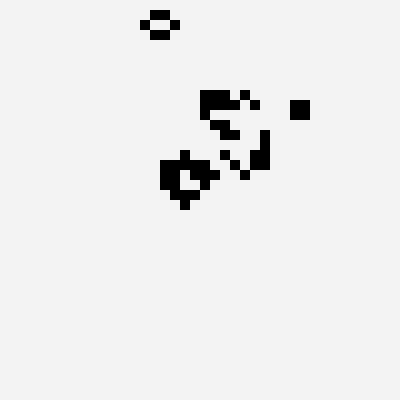
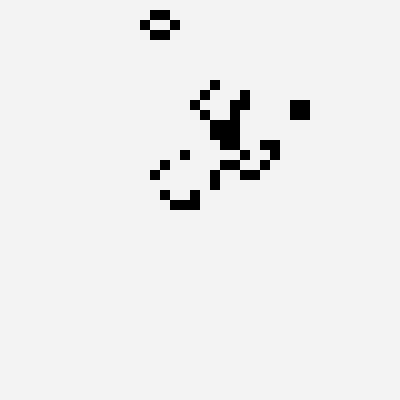
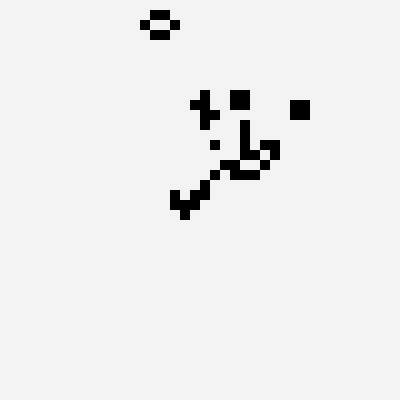
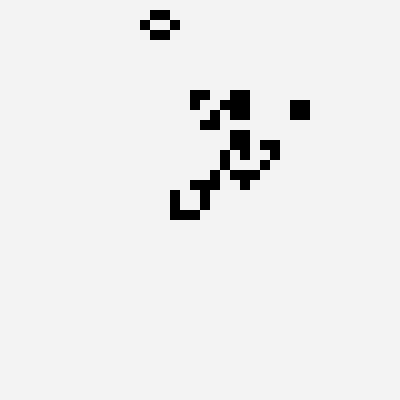
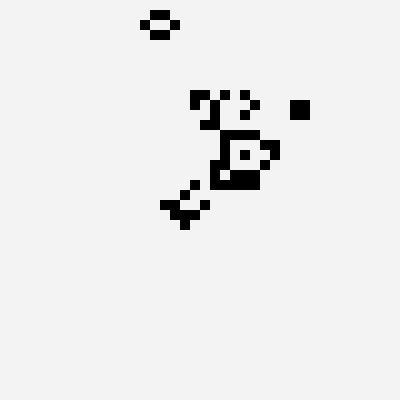
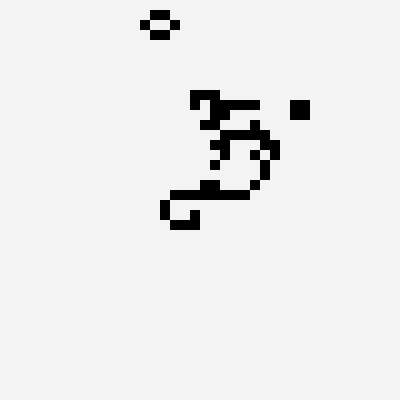
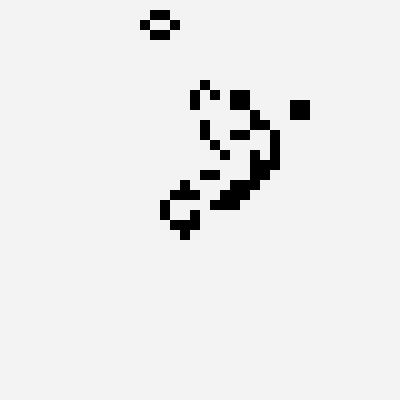
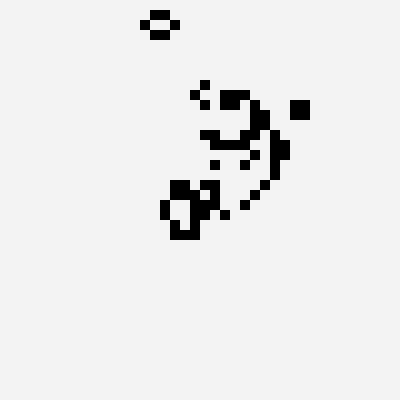
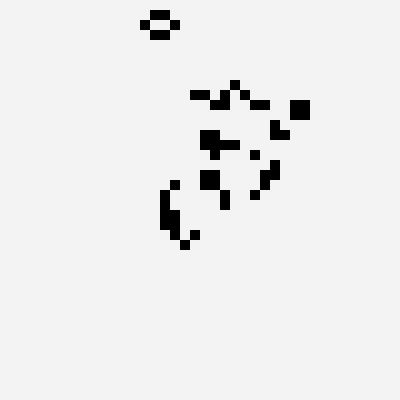
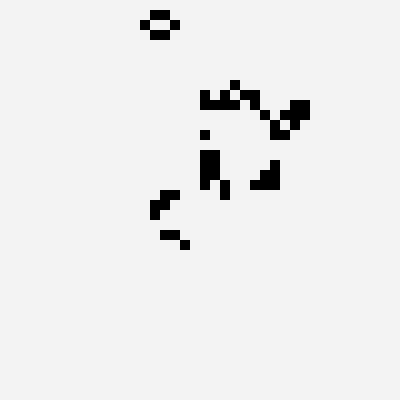
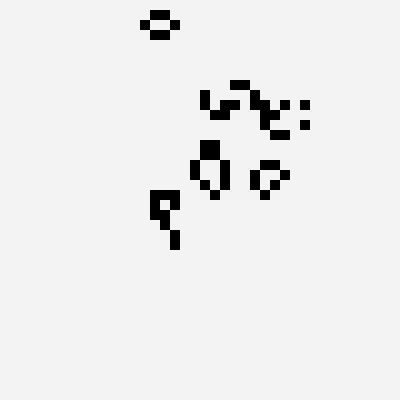
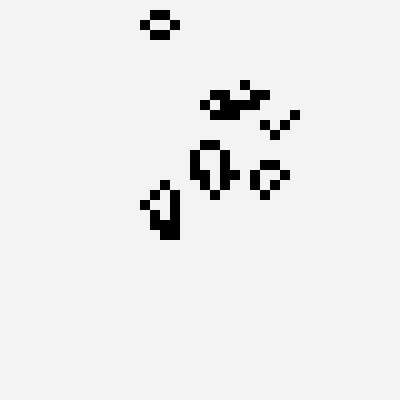
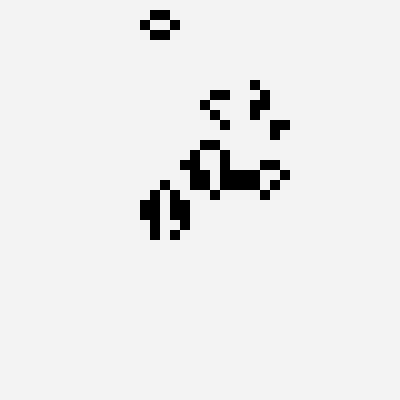
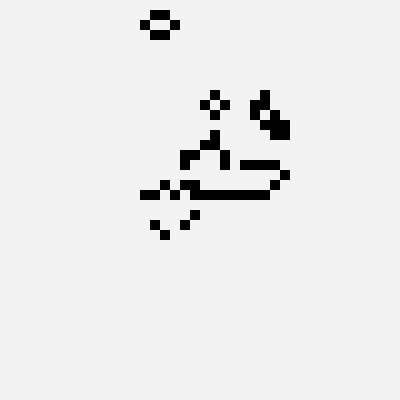

In [32]:
unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]
X = np.zeros((40, 40))
X[15:20, 18:23] = unbounded
life_animation(X, dpi=10, frames=100, interval=200, mode='once')

I'm leaving a few other fun grids that you can check out. Feel free to play around and make your own!

In [ ]:
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.zeros((40, 40))
X[1:10,1:37] = glider_gun

life_animation(X, dpi=15, frames=180, interval=50, mode='once')
#life animation used to work here but doesn't anymore.

In [ ]:
X = np.zeros((17, 17))
X[2, 4:7] = 1
X[4:7, 7] = 1
X += X.T
X += X[:, ::-1]
X += X[::-1, :]
life_animation(X, frames=6)
#life animation used to work here but doesn't anymore.

Feel free to define your own grids and see how they evolve. The simplest way is to use the `np.array()` function which takes a list and converts it to a numpy array.

```python
>>> mygrid = [[1, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 0, 0]]
>>> life_animation(np.array(mygrid), frames=20)
```

### Bonus: User-Friendly Interface (10 points)

Finally, let's make a nice interface so users can enter a grid, the number of steps to run, and automatically visualize the simulation.

Write a function called `play()` that takes no input and prompts the user to enter the grid row by run until they enter an `@` character.

Feel free to be creative with this one. 

The function should do something like, check:

1. Each value taken as input is an integer
2. That the value is either 0 or 1
3. The user entered the same number of rows as columns.
4. Check that a valid number of steps was provided (you can give a default value to number of steps if not specified)

For top marks, you should let the user re-enter a row or the whole grid if they did it incorrectly without crashing the program.

In [34]:
def play():
    grid = []
    row = []
    rowcount = 0
    wrong = 0
    breakout = False
    bad = False
    while True:
        neat_row = []
        row = input("Enter your row: ")
        if row == "@":
            break
        else:
            if " " in row:
                row = row.split() #incase the rows are entered with spaces in between
            try:
                for i in row:
                    wrong = neat_row.append(int(i))
            except ValueError:
                print("All values must be integers. Try again.")
                continue
            else:
                for i in neat_row:
                    if i != 0 and i != 1:
                        bad = True 
                        #because I want to continue to next iteration of while loop, 
                        #but if I use continue in the for loop, 
                        #it will simply conitnue to next iteration of the for loop
                if bad == True:
                    print("All values must be 0 or 1. Try again.")
                else:
                    if rowcount == 0: 
                        #for first iteration, I do not want to attempt to access grid[0]
                        #because it doesn't exist yet
                        grid.append(neat_row)
                        rowcount+=1
                    else:
                        if len(neat_row) == len(grid[0]): #make sure all subsequent col counts are equal to the first row
                            grid.append(neat_row)
                            rowcount+= 1
                        else: 
                            print("The number of columns in each row must be the same.")
                            continue
                        if rowcount == len(grid[0]): # once row count = col count, no more user input allowed 
                            break
                bad = False #reset
    while True:
        steps = input("How many steps? ")
        try:
            steps = int(steps)
        except ValueError:
            print("Invalid number. Try again.")
        else: 
            break
    life_animation(np.array(grid), frames=steps)
    #cannot get life_animation to "animate" even though I moved it out of the try block.
play()

Enter your row: 1 1 1
Enter your row: 1 1 1
Enter your row: 1 1 1
How many steps? 2
